### Part One Data Summary
The data set provides 53940 different diamonds. They are ten attributes. They are int type, float type, and object type. Those attributes are regarding diamond Specification. Those are carat,cut,color, clarity, depth,table,prince,x,y and z.
- Carat refers to weight of the diamond
- Cut refers to the quality of the cut. It is ranked Fair, Good, Very Good, Premium, or Ideal.
- Color refers to the color of the diamond. From D(good) to J(bad).
- clarity refers to the measurement of how clear the diamond is. (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
- x refers to length of the diamond in mm. The range is 0 to 10.74.
- y refers to width of the diamond in mm. The range is 0 to 58.9.
- z refers to depth of the diamond in mm. The range is 0 to 31.8.
- depth refers to the distance from the diamond's culet to the table. The value is calculated by dividing the height of the diamond by the diamonds' width.
- table refers to the facet which can be seen when the diamond is viewed face up. The value is calculated by dividing the table width by the diameter.





In [1]:
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/quiz/diamonds.csv')

df.rename(columns={list(df)[0]: 'number'}, inplace=True)
# df.count()
# df.dtypes
# df.describe()
# first_col = df.iloc[:,0]
# print(first_col)
df.head()


,number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Part Two EDA
1. carat --- The mean of the carat column is 0.797940, the min of the carat column is 0.2, and the max of the carat column is 5.01.

2. depth --- The mean of the depth column is 61.749405, the min of the depth column is 43.0, and the max of the depth column is 79.

3. table --- The mean of the table column is 57.45, the min of the table column is 43.0, and the max of the table column is 95.

4. price --- The mean of the price column is 3932.79, the min of the price column is 326.00, and the max of the price column is 18823.0.
5. x --- The mean of the length is 5.731, the min of the length is 0, and the max of the length is 10.74.
6. y --- The mean of the width is  5.734, the min of the width is 0, and the max of the width is 58.9.
7. z --- The mean of the depth is 3.53, the min of the depth is 0, and the max of the depth is 31.8.



In [2]:
df.describe()

,number,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [3]:
df.isnull().sum()

number     0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

From there we can see there is no missing data in the dataset. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


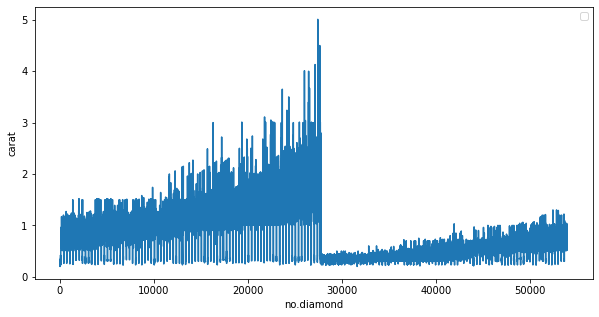

<AxesSubplot:xlabel='number', ylabel='carat'>

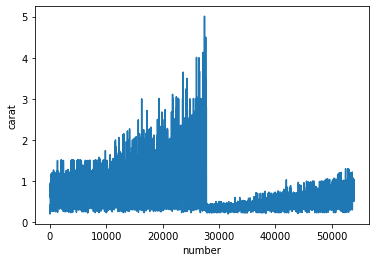

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10, 5))
plt.plot(df['carat'])
plt.xlabel('no.diamond')
plt.ylabel('carat')
plt.legend()
plt.show()
x_y = df[['number','carat']]
sns.lineplot(data = x_y, x = 'number',y='carat')

From the graph, we can see the max carat of those diamonds is around 5.0, and no diamond that has zero carats.

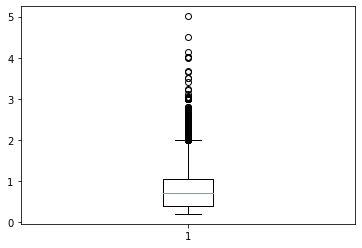

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

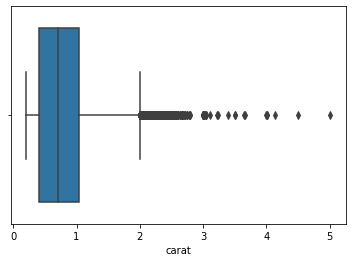

In [5]:
plt.boxplot(df['carat'])
plt.show()
sns.boxplot(df['carat'])

In the above graph, the values above two and below 0.3ish are acting as outliers.

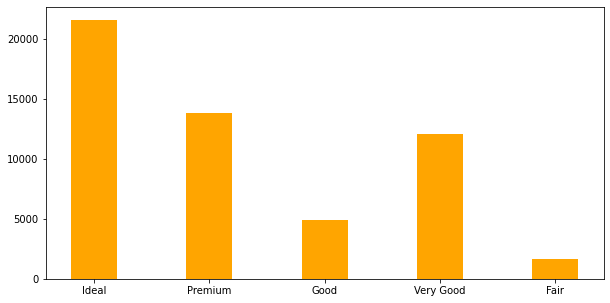

<AxesSubplot:>

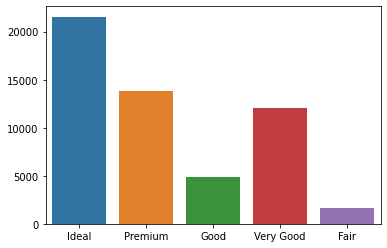

In [6]:
import collections

cut_list = df['cut'].tolist()
fig = plt.figure(figsize=(10, 5))
list_counted = collections.Counter(cut_list)
x_axis = list(list_counted.keys())
y_axis = list(list_counted.values())
plt.bar(x_axis,y_axis,color='orange',width=0.4)
plt.show()
sns.barplot(x = x_axis,y = y_axis)


In the above graph, there are over 20k diamonds with ideal cut, little less than 15k diamonds with premium cut, little less than 5k diamonds with a good cut, around 14k diamonds with a very good cut, and less than 5k diamonds with a fair cut.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


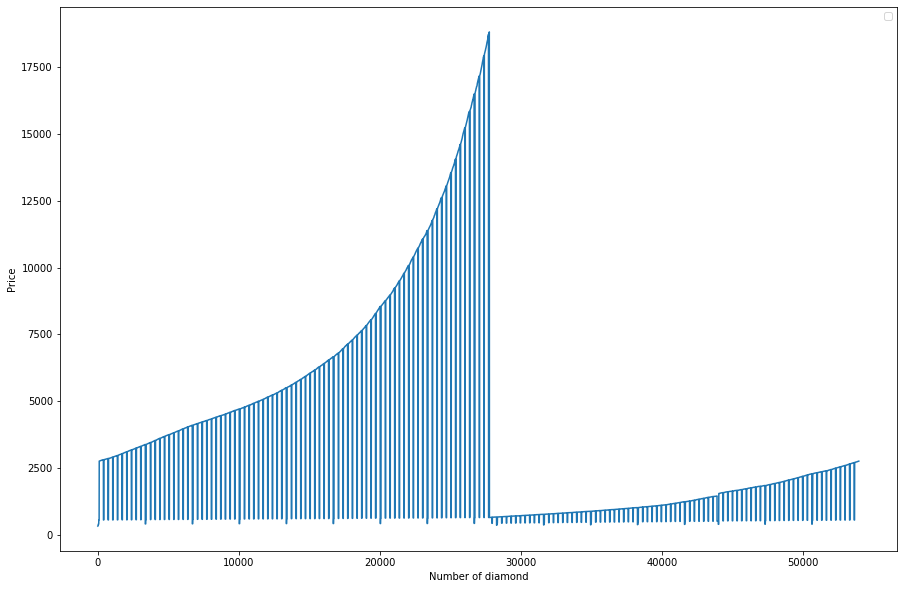

<AxesSubplot:xlabel='number', ylabel='price'>

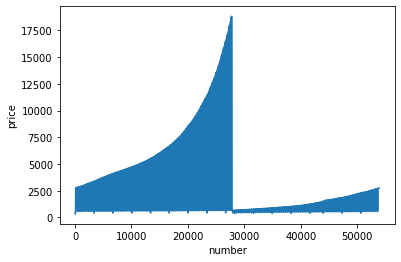

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.plot(df['price'])
plt.xlabel('Number of diamond')
plt.ylabel('Price')
plt.legend()
plt.show()
x_y = df[['number','price']]
sns.lineplot(data = x_y, x='number', y='price')

In the above graph, we can see the most expensive diamond is above 17k5, and the cheap one is around 500.

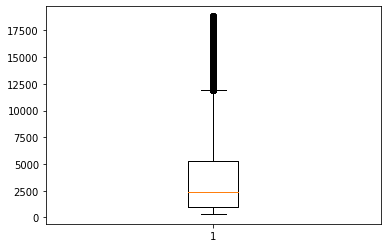

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

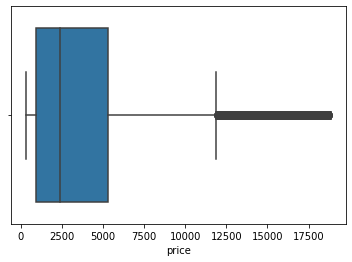

In [8]:
plt.boxplot(df['price'])
plt.show()
sns.boxplot(df['price'])


In the above graph, the price above 12k5 and below 500 are acting as outliers.

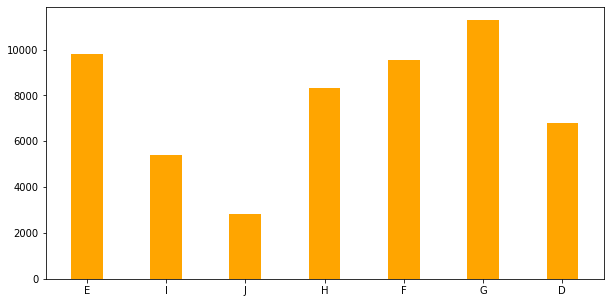

<AxesSubplot:>

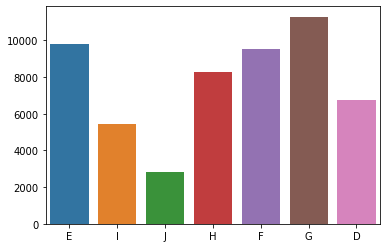

In [9]:
cut_list = df['color'].tolist()
fig = plt.figure(figsize=(10, 5))
list_counted = collections.Counter(cut_list)
x_axis = list(list_counted.keys())
y_axis = list(list_counted.values())
plt.bar(x_axis,y_axis,color='orange',width=0.4)
plt.show()
sns.barplot(x = x_axis,y = y_axis)

In the above graph, we can see most diamonds color are in the G category, category E has the second-most diamonds. There are more than 6k diamonds in the D category, and there are around 3k8 diamonds in the J category.

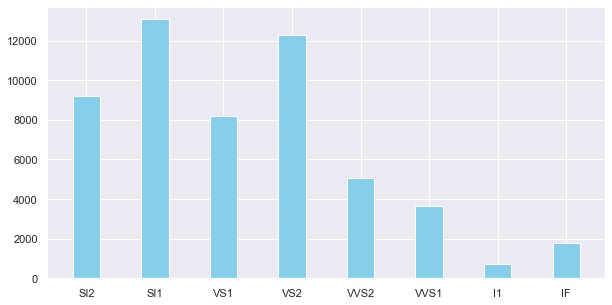

<AxesSubplot:>

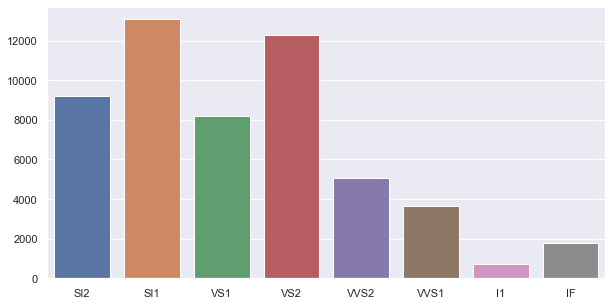

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.set(rc={'figure.figsize': (10, 5)})
clarity_list = df['clarity'].tolist()
clarity_count = collections.Counter(clarity_list)
x_clarity = list(clarity_count.keys())
y_clarity = list(clarity_count.values())
plt.bar(x_clarity, y_clarity, color='skyblue', width=0.4)
plt.show()
sns.barplot(x = x_clarity,y = y_clarity)

In the above graph, we can see there are over 12k diamonds in the Sl1 category, and there are around 12k diamonds in the VS2 category. There are only around 2k diamonds in the IF(best) category, and there are around 500 diamonds in the l1(worst) category.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


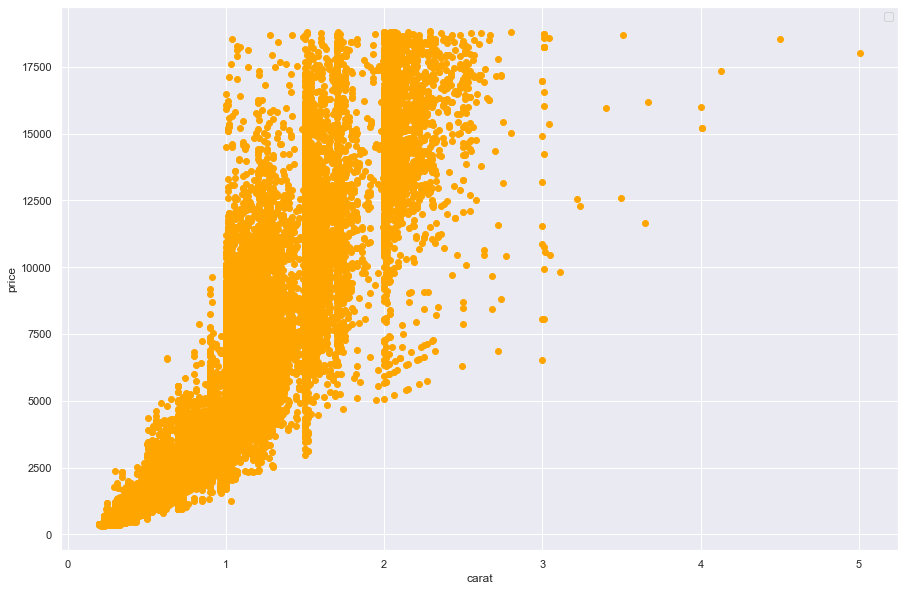

<AxesSubplot:xlabel='carat', ylabel='price'>

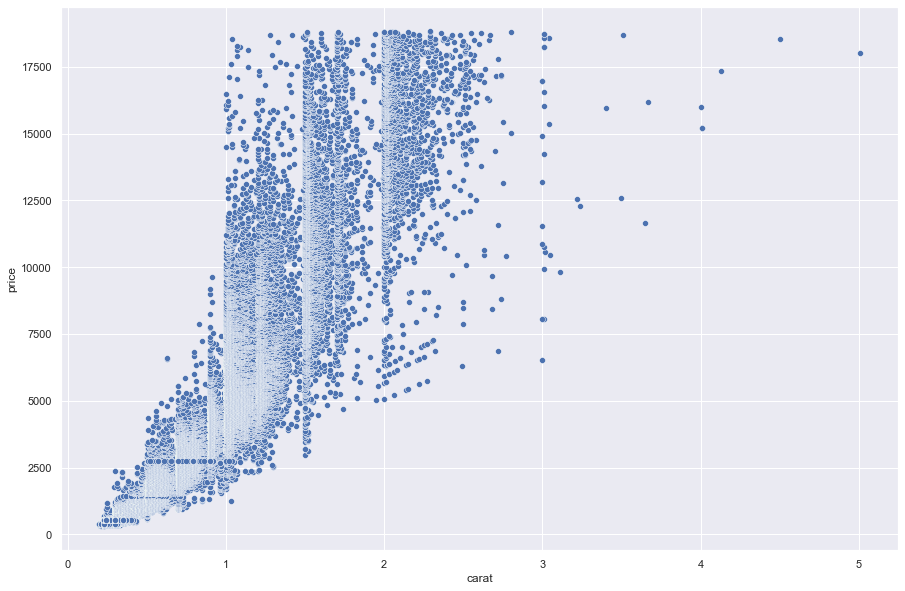

In [11]:
fig, ax = plt.subplots(1, figsize=(15, 10))


plt.scatter(df['carat'], df['price'], color='orange')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()
plt.show()
carat_price = df[['carat', 'price']]
sns.set(rc={'figure.figsize': (15, 10)})

sns.scatterplot(data=carat_price, x='carat', y='price')


In the graph above, we can see that the most expensive diamond is not the highest carat diamond. However, most cheap diamonds are low carat.

From EDA findings, I found out that the max price for a diamond is around 18k, the mean for diamonds price is around 4k, and the min price for diamonds price is around 326. The normal price for a diamond is in the 326 to 12k5 range. The outlier range is above 12k5.
The carat of a diamond affects the price, but it does not mean that a diamond that has a high carat is more expensive than a low carat one. In most cases it is true, but not all the cases.  In this data set, most diamonds have average clarity, not the best nor the worst. This also applies to colors.

## Part Three Inferences


In [22]:
# question 1
carat = df['carat'].tolist()

res = [val for val in carat if val > 0.30 and val < 1.08]

proportion = len(res) / len(carat)
print(str(round(proportion,2) * 100)+'%')


69.0%


First, I convert the carat column to a list. Then use list comprehension to generate a diamond whose carat is in [0.3,1.08]. Finally, by dividing the new list by the carat list to get a percentage.

In [24]:
# question 2
x = df['x'].tolist()
y = df['y'].tolist()
union_x_y = list(set(x) & set(y))
print(len(union_x_y))

521


First, I convert the x column and the y column into two different lists. Use set to delete duplicates value in the list. Finally, return the new list.

In [28]:
# question 3
mean_value = df['carat'].mean()
less_mean = [val for val in df['carat'].tolist() if val < mean_value]
print(len(less_mean))


31127


First, I use the pandas method to get the mean value, then use list comprehension to form a list the carat value is less than the mean value. 

In [29]:
# question 4
cuts = df['cut'].tolist()

premium_or_better_cuts = [val for val in cuts if val.lower() == 'premium' or val.lower() == 'ideal']
print(len(premium_or_better_cuts))


35342


First, turn the cut column into a list, then loop through the list if Val is premium or ideal push that value into a new list.

In [38]:
# question 5 
max_price = max(df['price'].tolist())
idx = [idx for idx,val in enumerate(df['price'].tolist()) if val == max_price][0]
# print(idx)
# print(max_price)

print(f'Number: {idx} diamond has highest price per carat, and its value is {max_price}')


27749
18823
Number: 27749 diamond has highest price per carat, and its value is 18823


First I use the max function to get the max price in the column. Loop through the list to see which price is the same as the max price, if found the value then return its index.

<AxesSubplot:xlabel='cut', ylabel='price'>

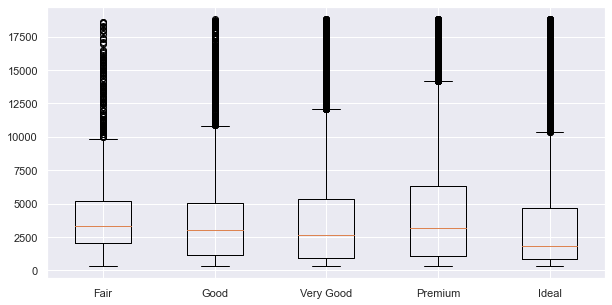

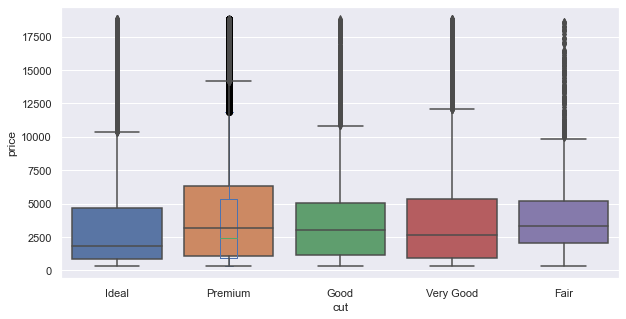

In [82]:
# question 6


fair_price = []
fair_price =[]
good_price =[]
very_good_price = []
premium_price = []
ideal_price =[]

combined_list = zip(df['cut'].tolist(),df['price'].tolist())

for val in combined_list:
    cut,price = val
    if cut == 'Fair':
        fair_price.append(price)
    elif cut == 'Good':
        good_price.append(price)
    elif cut == 'Very Good':
        very_good_price.append(price)
    elif cut == 'Premium':
        premium_price.append(price)
    else:
        ideal_price.append(price)
    


sns.set(rc={'figure.figsize': (10, 5)})

mapping = {
    'Fair':fair_price,
    'Good':good_price,
    'Very Good':very_good_price,
    'Premium':premium_price,
    'Ideal':ideal_price
}
fig, ax = plt.subplots()

ax.boxplot(list(mapping.values()))
ax.set_xticklabels(list(mapping.keys()))


new_pd = df[['cut','price']]
ax = df[['cut', 'price']].plot(kind='box')

sns.boxplot(x='cut',y='price',data = new_pd)



For seanborn boxplot just use the built-in function to create boxplot. For matplotlib, I do some processing. First I use the zip function to combine two-column into one list. push its prince to the correct list. Then I create a dictionary, pass dictionary keys to  matplotlit set_xticklabels function and value to boxplot function. 


The median price for different cut diamonds is pretty close. The normal price of a premium cut diamond has a longer range than any other diamond cut.  The diamond with a premium cut has the highest price. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


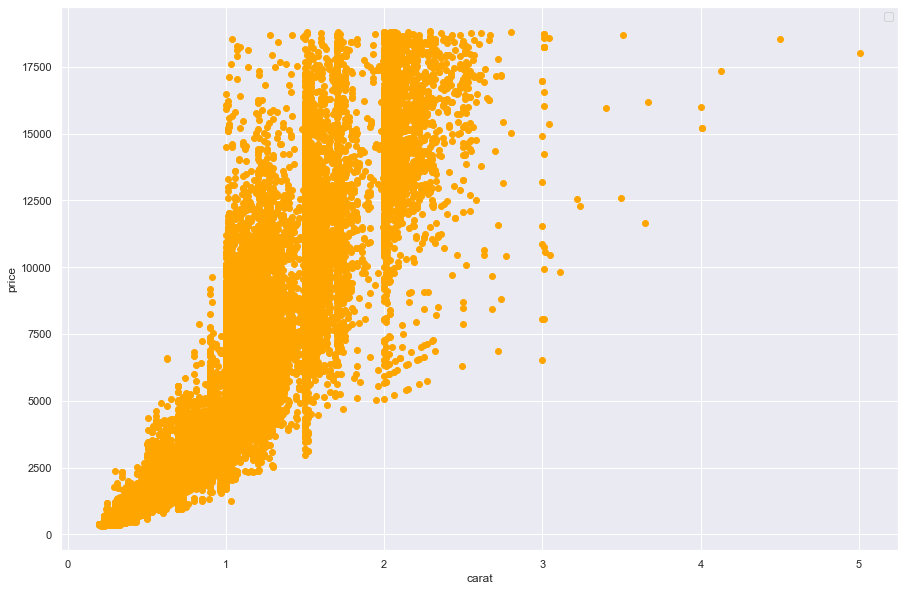

<AxesSubplot:xlabel='carat', ylabel='price'>

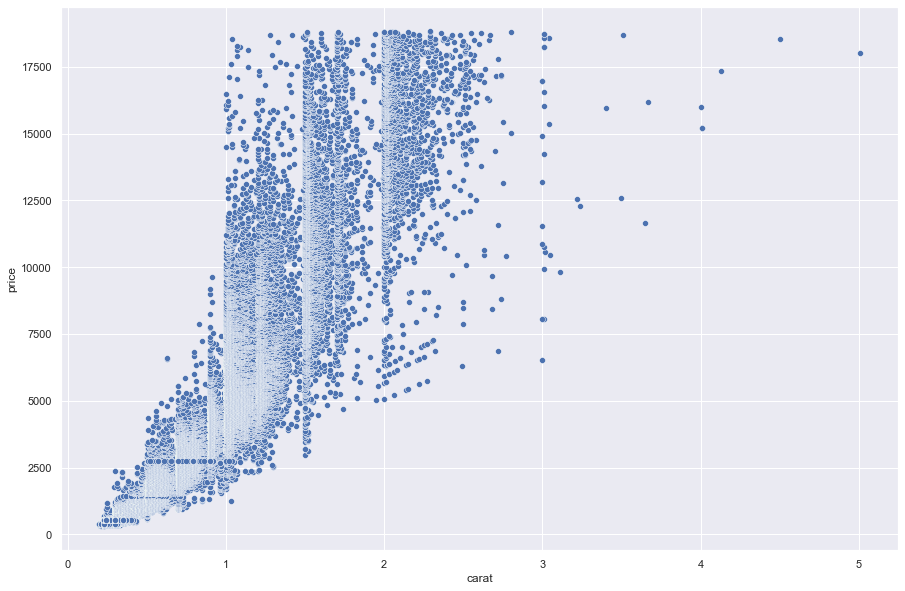

In [63]:
# question 9
fig, ax = plt.subplots(1, figsize=(15, 10))


plt.scatter(df['carat'], df['price'], color='orange')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()
plt.show()
carat_price = df[['carat', 'price']]
sns.set(rc={'figure.figsize': (15, 10)})

sns.scatterplot(data=carat_price, x='carat', y='price')


Basically pass selected columns to the built in function to create a scatter graph.

In the graph above, we can see that the most expensive diamond is not the highest carat diamond. However, most cheap diamonds are low carat. Most diamonds are in 1 to 2 carat range. 0 to 1-carat diamonds are below the price of 5k. There are few diamonds that carat is over 3. In most cases, the more carat the higher price for diamonds.

# Part Four Conclusion

The carat of a diamond will have an effect on its price, but the cut, clarity, and color will also have an effect on its price. In some cases, a lower carat will be more expensive than the one with a higher carart. However, it is not often happening. most diamonds' carat is between 1 and 2, but the price can vary from 2k5 to over 17k5.  Most diamonds ' clarity is in the standard category, not the best nor not worst. Most diamonds' colors are in a good category. Most diamonds are with ideal cut, less diamonds are with fair cut, which is good in this case.

# Reference

- https://ggplot2.tidyverse.org/reference/diamonds.html
- stackoverflow
- w3school
- seanborn doc
- matplotlib doc